## Decision Tree Model

In [11]:
import numpy as np
import joblib
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Load Preprocessed Data

X_train = np.load(r"../data/processed/X_train.npy")
X_test  = np.load(r"../data/processed/X_test.npy")
y_train = np.load(r"../data/processed/y_train.npy")
y_test  = np.load(r"../data/processed/y_test.npy")


In [13]:
# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

In [14]:
# Hyperparameter Tuning (Optional)
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(dt_model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [15]:
# Train Final Model
best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,4
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [16]:
# Evaluate Model
y_pred = best_dt.predict(X_test)
y_proba = best_dt.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nROC-AUC Score:", roc_auc_score(y_test, y_proba))

Accuracy: 0.7934705464868701

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.87      0.86      1035
           1       0.61      0.59      0.60       374

    accuracy                           0.79      1409
   macro avg       0.73      0.73      0.73      1409
weighted avg       0.79      0.79      0.79      1409


Confusion Matrix:
 [[896 139]
 [152 222]]

ROC-AUC Score: 0.8270376398253636


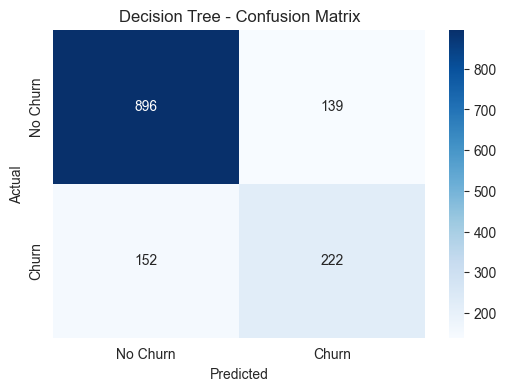

In [17]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])

plt.title("Decision Tree - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [18]:
# Save Model
import os
models_path = os.path.abspath(os.path.join('..','models'))
os.makedirs(models_path, exist_ok=True)

joblib.dump(best_dt, os.path.join(models_path, 'decision_tree_model.joblib'))
print("Decision Tree model saved!")

Decision Tree model saved!
